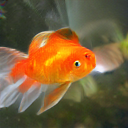

In [1]:
import torch
from pytorch_pretrained_biggan import BigGAN, truncated_noise_sample
from torchvision.transforms import ToPILImage
from IPython.display import display
from pathlib import Path
import yaml


device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Load pretrained model
model = BigGAN.from_pretrained('biggan-deep-128').to(device).eval()

# Pick a random ImageNet class (integer ID 0–999)
class_id = 1  # e.g., golden retriever
class_vector = torch.zeros((1, 1000))
class_vector[0, class_id] = 1

# Random latent vector
noise_vector = torch.from_numpy(truncated_noise_sample(truncation=0.5, batch_size=1))

# Move to device
noise_vector = noise_vector.to(device)
class_vector = class_vector.to(device)

# Generate image
with torch.no_grad():
    out = model(noise_vector, class_vector, truncation=0.5)

# Convert [-1,1] → [0,1] and display
img = (out.squeeze(0).cpu() + 1) / 2
display(ToPILImage()(img))


Loaded fine-tuned weights from models/biggan_finetuned_normal_128.pth


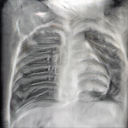

In [2]:
# Load config
cfg = yaml.safe_load(open("config.yaml"))
target_dir = Path(cfg["target_dir"])
img_size = int(cfg.get("IMG_SIZE", 128))

# Device
device = torch.device("mps" if torch.backends.mps.is_available()
                      else "cuda" if torch.cuda.is_available()
                      else "cpu")

# Load pretrained BigGAN and fine-tuned weights
G = BigGAN.from_pretrained('biggan-deep-128').to(device).eval()
ckpt = "models/biggan_finetuned_normal_128.pth"
G.load_state_dict(torch.load(ckpt, map_location=device))
print(f"Loaded fine-tuned weights from {ckpt}")

# Generate noise and class vector
z = torch.from_numpy(truncated_noise_sample(truncation=0.5, batch_size=1)).to(device)
y = torch.zeros((1, 1000), device=device)  # single class placeholder

# Generate image
with torch.no_grad():
    out = G(z, y, truncation=0.5)

# Convert [-1,1] -> [0,1] and display
img = (out.squeeze(0).cpu() + 1) / 2
display(ToPILImage()(img))
